In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
path = 'datasets/housing/'
housing = pd.read_csv(path+'housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


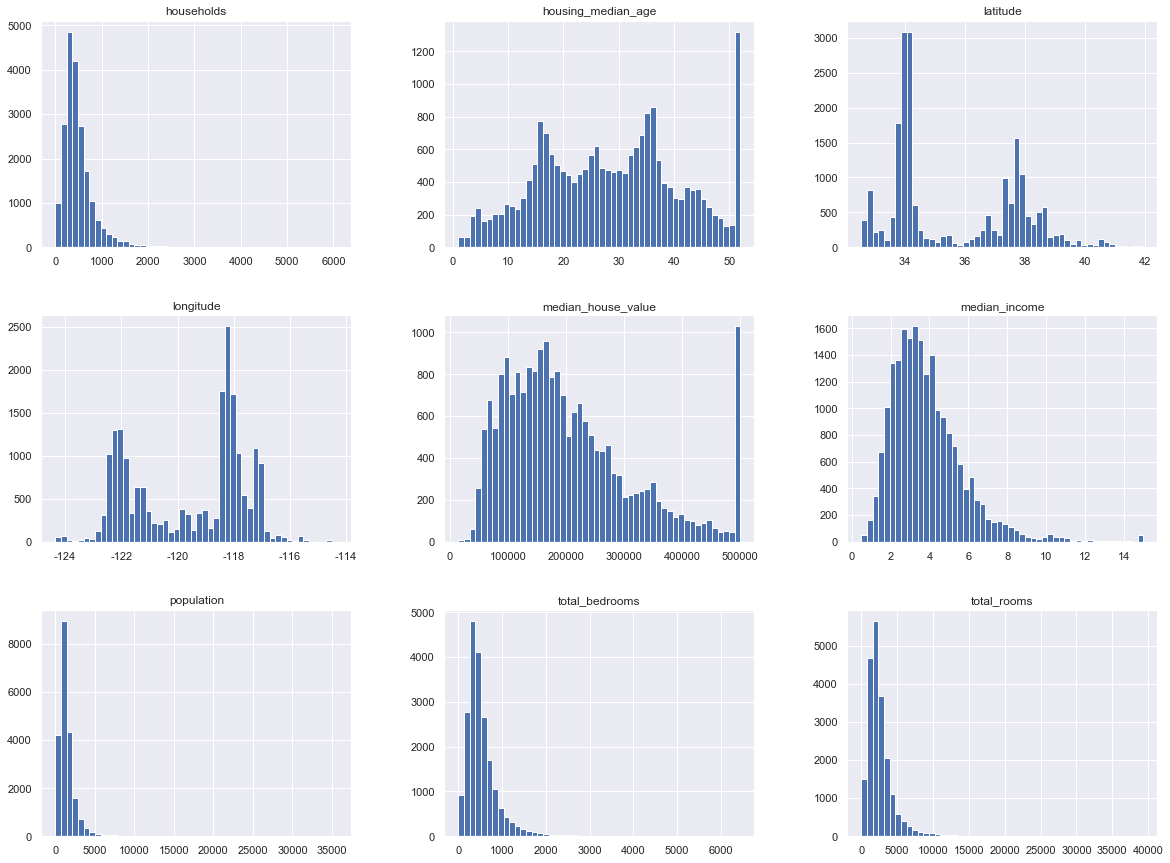

In [6]:
_ = housing.hist(bins=50,figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [9]:
housing['income_cat'] = np.ceil(housing.median_income/1.5)
housing['income_cat'].where(housing['income_cat'] < 5,5.0,inplace=True) # 将所有大于5的标签替换为5

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=41)
for train_index,test_index in split.split(housing,housing['income_cat']):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

In [12]:
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=41,stratify=housing['income_cat']) # 分层抽样也可这样

In [13]:
train_set.drop(['income_cat'],axis=1,inplace=True)
test_set.drop(['income_cat'],axis=1,inplace=True)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
housing2 = train_set.copy() # 创建训练集副本，进行数据探索，保证不影响原始训练集

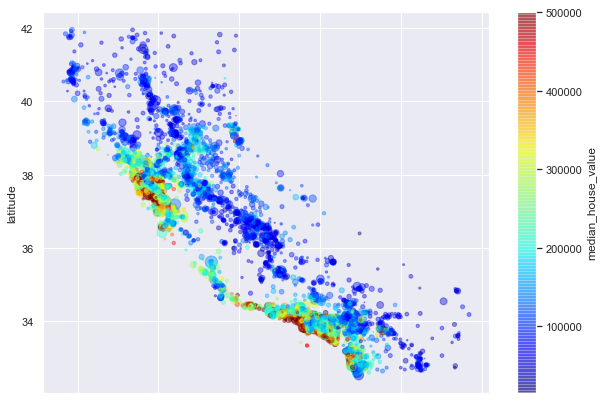

In [15]:
housing2.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',alpha=0.4,s=housing['population']/100,
             cmap=plt.cm.jet,colorbar=True,figsize=(10,7))

In [16]:
corr_matrix = housing2.corr()

In [17]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687668
total_rooms           0.131987
housing_median_age    0.111686
households            0.063285
total_bedrooms        0.046671
population           -0.024677
longitude            -0.049897
latitude             -0.141620
Name: median_house_value, dtype: float64

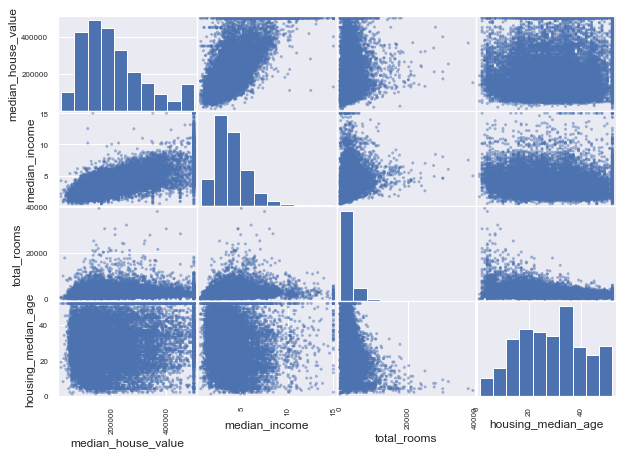

In [18]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
_ = pd.plotting.scatter_matrix(housing2[attributes],figsize=(10,7))

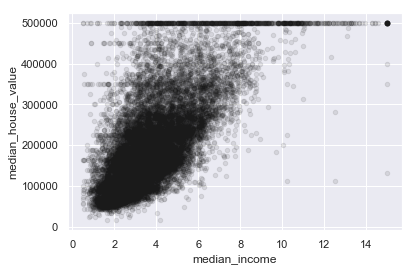

In [19]:
housing2.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,c='k')

In [20]:
housing2['rooms_per_household'] = housing2['total_rooms']/housing2['households']
housing2['bedrooms_per_room'] = housing2['total_bedrooms']/housing2['total_rooms']
housing2['population'] = housing2['population']/housing2['households']

In [21]:
corr_matrix = housing2.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.687668
rooms_per_household    0.155908
total_rooms            0.131987
housing_median_age     0.111686
households             0.063285
total_bedrooms         0.046671
population            -0.032129
longitude             -0.049897
latitude              -0.141620
bedrooms_per_room     -0.256628
Name: median_house_value, dtype: float64

In [22]:
housing3 = train_set.drop('median_house_value',axis=1)
housing3_label = train_set.median_house_value.copy()

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='median') # 简单估计器用于估计中位数

In [25]:
housing_num = housing3.drop('ocean_proximity',axis=1)

In [26]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [27]:
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  435.     ,
       1166.     ,  409.     ,    3.53605])

In [28]:
X = imputer.transform(housing_num)

In [29]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [30]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162
1,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001
2,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031
3,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911
4,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721
...,...,...,...,...,...,...,...,...
16507,-117.91,33.76,22.0,7531.0,1569.0,5254.0,1523.0,3.8506
16508,-121.97,37.31,25.0,5775.0,1225.0,3580.0,1138.0,3.9187
16509,-122.52,37.90,16.0,1704.0,402.0,689.0,348.0,4.4239
16510,-121.86,37.38,15.0,2052.0,405.0,1380.0,409.0,5.8686


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
housing3_cat_encoded = encoder.fit_transform(housing3['ocean_proximity'])

In [33]:
housing3_cat_encoded

array([0, 0, 1, ..., 3, 0, 0])

In [34]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [35]:
housing3['ocean_proximity'].factorize()

(array([0, 0, 1, ..., 2, 0, 0], dtype=int64),
 Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'], dtype='object'))

In [36]:
pd.get_dummies(housing3_cat_encoded) # pd生成指标哑变量

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
16507,1,0,0,0,0
16508,1,0,0,0,0
16509,0,0,0,1,0
16510,1,0,0,0,0


In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing3_cat_encoded.reshape(-1,1)) # 返回scipy当中的稀疏矩阵，当类别很多时非常有用

In [38]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [39]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=False) # 此方法一步到位，将LabelEncoder与OneHotEncoder结合
housing_cat_1hot = encoder.fit_transform(housing3.ocean_proximity)

In [40]:
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [41]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

In [42]:
from sklearn.base import BaseEstimator,TransformerMixin

In [43]:
rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6
class CombineAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): # no **args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_householld = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_householld,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_householld]
attr_adder = CombineAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing3.values)

In [44]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

In [45]:
num_pipeline = Pipeline([
    ('inputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombineAttributeAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [46]:
housing_num_tr

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.08686294,
        -0.05081885, -0.59589883],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.97763978,
        -0.03281407, -1.31536433],
       [-0.97017917,  1.37993786,  0.58052093, ..., -0.50741255,
        -0.0213332 ,  0.8634663 ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ..., -0.21367022,
        -0.16283672,  0.33588826],
       [-1.1450612 ,  0.82152778, -1.08600881, ..., -0.16492238,
         0.05365635, -0.24709171],
       [ 0.75365796, -0.71761934,  0.73923805, ..., -0.05519075,
        -0.02969452, -0.49016635]])

In [47]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6
class CombineAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True): # no **args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_householld = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_householld,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_householld]
        
class DataFrameSelector(TransformerMixin,BaseEstimator):
    def __init__(self,typ=num_attribs):
        self.typ = typ
    def fit(self,X,y=None):
        return self
    def transform(self,df,y=None):
        return df[self.typ].values

class LabelBinarizer2(LabelBinarizer):
    def fit_transform(self,X,y=None):
        return super().fit_transform(X)
        
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('inputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombineAttributeAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',LabelBinarizer2()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [48]:
housing_prepared = full_pipeline.fit_transform(housing3)

In [49]:
housing_prepared

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97017917,  1.37993786,  0.58052093, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1450612 ,  0.82152778, -1.08600881, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75365796, -0.71761934,  0.73923805, ...,  0.        ,
         0.        ,  0.        ]])

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing3_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
some_data = housing3.iloc[:5]

In [53]:
some_labels = housing3_label.iloc[:5]

In [54]:
some_data_prepared = full_pipeline.transform(some_data)

In [55]:
print('Predictions:\t',lin_reg.predict(some_data_prepared).round(1).tolist())
print('Labels:\t\t',some_labels.tolist())

Predictions:	 [294588.4, 636762.8, 99093.8, 77575.5, 160899.2]
Labels:		 [318500.0, 500001.0, 93800.0, 59200.0, 150300.0]


In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing3_label,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68270.52887321486

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,housing_prepared,housing3_label,scoring='neg_mean_squared_error',cv=10 )

In [58]:
rmse_scores = np.sqrt(-scores)

In [70]:
def display_scores(scores,title='model'):
    print(title,':')
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [71]:
display_scores(rmse_scores,'线性模型')

线性模型 :
Scores: [70252.13639288 64961.60724865 70853.42251118 68293.03617368
 66704.59547379 69562.85846659 71559.86323545 72058.38613875
 67112.50151766 64462.72848797]
Mean: 68582.11356465958
Standard deviation: 2563.3365782465626


In [61]:
from sklearn.tree import DecisionTreeRegressor
lin_tree = DecisionTreeRegressor()

In [62]:
scores_tree = cross_val_score(lin_tree,housing_prepared,housing3_label,scoring='neg_mean_squared_error',cv=10)
rmse_scores_tree = np.sqrt(-scores_tree)

In [72]:
display_scores(rmse_scores_tree,'决策树')

决策树 :
Scores: [70808.3060547  69324.63802346 72032.41772755 73319.30212687
 70777.77958697 74276.14661977 73425.49947912 69638.9126536
 71061.521607   68740.7391909 ]
Mean: 71340.52630699374
Standard deviation: 1781.9994604109731


In [65]:
from sklearn.ensemble import RandomForestRegressor
lin_forest = RandomForestRegressor()
scores_forest = cross_val_score(lin_forest,housing_prepared,housing3_label,scoring='neg_mean_squared_error',cv=10)
rmse_scores_forest = np.sqrt(-scores_forest)

In [73]:
display_scores(rmse_scores_forest,'随机森林')

随机森林 :
Scores: [48578.48164943 48603.97048491 51285.06911061 51027.34475614
 48741.59145144 51393.20007823 51213.39127863 48974.80559376
 48575.09910981 48122.44760401]
Mean: 49651.5401116965
Standard deviation: 1306.3573708110027


In [74]:
lin_forest.fit(housing_prepared,housing3_label)
housing_predictions = lin_forest.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions,housing3_label)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18436.32602972061

In [83]:
from sklearn.model_selection import GridSearchCV

In [87]:
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(housing_prepared,housing3_label)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
cvres = grid_search.cv_results_
for mean_score,std_score,params in zip(cvres['mean_test_score'],cvres['std_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

63714.58118809965 {'max_features': 2, 'n_estimators': 3}
55454.10788858729 {'max_features': 2, 'n_estimators': 10}
52210.45477046993 {'max_features': 2, 'n_estimators': 30}
59963.02983097562 {'max_features': 4, 'n_estimators': 3}
52443.43087581659 {'max_features': 4, 'n_estimators': 10}
49721.05577755319 {'max_features': 4, 'n_estimators': 30}
58426.01869761303 {'max_features': 6, 'n_estimators': 3}
51559.59434876835 {'max_features': 6, 'n_estimators': 10}
49752.246439491486 {'max_features': 6, 'n_estimators': 30}
57151.32398585512 {'max_features': 8, 'n_estimators': 3}
52161.6215508406 {'max_features': 8, 'n_estimators': 10}
49539.837800347326 {'max_features': 8, 'n_estimators': 30}
61960.791653644446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53387.961702616696 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58350.88950207882 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51779.148501647396 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
rand_search = RandomizedSearchCV(forest_reg,param_grid,n_iter=5,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
rand_search.fit(housing_prepared,housing3_label)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [105]:
cvres = rand_search.cv_results_
for mean_score,std_score,params in zip(cvres['mean_test_score'],cvres['std_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

52571.58340505243 {'n_estimators': 30, 'max_features': 2}
59260.96819588546 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
59023.61520694103 {'n_estimators': 3, 'max_features': 8}
54020.24722046642 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
55417.54178812279 {'n_estimators': 10, 'max_features': 2}


In [110]:
grid_search.best_estimator_.feature_importances_.round(3)

array([0.078, 0.067, 0.043, 0.016, 0.014, 0.015, 0.014, 0.338, 0.047,
       0.11 , 0.083, 0.011, 0.154, 0.   , 0.003, 0.004])

In [126]:
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_hhold']
cat_one_hot_attribs = cat_pipeline.steps[1][1].classes_.tolist()
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(attributes,grid_search.best_estimator_.feature_importances_.round(3)),key=lambda g: g[1],reverse=True)

[('median_income', 0.338),
 ('INLAND', 0.154),
 ('pop_per_hhold', 0.11),
 ('bedrooms_per_hhold', 0.083),
 ('longitude', 0.078),
 ('latitude', 0.067),
 ('rooms_per_hhold', 0.047),
 ('housing_median_age', 0.043),
 ('total_rooms', 0.016),
 ('population', 0.015),
 ('total_bedrooms', 0.014),
 ('households', 0.014),
 ('<1H OCEAN', 0.011),
 ('NEAR OCEAN', 0.004),
 ('NEAR BAY', 0.003),
 ('ISLAND', 0.0)]

In [127]:
final_model = grid_search.best_estimator_

In [129]:
X_test = test_set.drop('median_house_value',axis=1)
y_test = test_set.median_house_value.copy()

In [130]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [131]:
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [133]:
final_rmse

49100.109462521934